* 전처리 과정에서 해결해야하는 문제점

>좋아요 대신에 동영상 조회수 -> 어떻게 구분할 것인가(오늘 정하기)
1. 동영상 크롤링
2. 게시글 직접 확인(!!!???!?!?!?!)
3. 좋아요 평균값으로 넣기~~(!?!?!?!?!?!??!?!?!?!?!좋다좋다) = 땅땅땅

>좋아요를 숨긴 게시글 필터링
>> ~~외 여러명이 좋아합니다 => 찾아서 전처리 (이것도 평균값 땅땅땅)

>전체 게시글 좋아요 숨김 - 쉣
>>hwyer = 지원이랑 나랑 세보자~~!!!

>각자 크롤링한 부분을 어떻게 병합할 것인가?
1. 크롤링은 계속 진행을 하자!!
2. 중첩되는 크롤링 결과를 어떻게 제거할 것인가~~??(숙제) - 유나가 12월 1일까지 한 번 생각해보기(코드 짤 수 있으면 좋고)

* 역할 분담
0. 12월 4일 정도까지 전처리 및 EDA 마무리...?
1. 데이터 프레임 전처리(1) - 유나(적당한 시간...)
2. EDA/모델 고안(2) - 지원 산하(12월 5~6일)
3. 자연어처리(현부) -쉣 (12월 4~5일)
4. 추가 에러 수정 및 기타 노가다 - 서아림ㅋ(만약 노가다할 게 없으면... 좀 크롤링(댓글 크롤링, 팔로워, 팔로잉 목록 크롤링) 좀... 코드좀... 업데이트 좀... 해줘...)

* EDA 방식 논의
1. 게시글 길이수(이건 산하 유나 지원이가 해 ^^)와 좋아요 & 팔로우 수의 상관관계
2. 팔로워/팔로잉/게시글수/좋아요수에 대한 기본적인 분포
3. 게시글 간격 평균-> 전처리 필요
4. 숫자로 나오는 것들 상관계수
5. 하나의 칼럼 - 팔로워/팔로잉 하나의 변수로 추가하는 것 -> EDA
6. MBTI 라벨에 따라서 (좋아요,팔로워,팔로잉,게시글수,팔로워/팔로잉 비율, 게시글 시간간격, 태그 수, 위치 등)이 어떤 양상을 보이는지

* 자연어처리 방안(NLP)
1. 품사 비율
2. 품사 수(형용사 몇개, 명사 몇 개, 부사 몇 개, 수식언 몇 개, 문장 당 품사 비율)
3. 단어 수
4. 해시태그 단어 빈도 등등(ootd, f4f, etc) => 내가 알려주면 유나 산하 지원이가 모델 만들 때 반영해서 전처리 하고 사용



In [ ]:
!pip install konlpy # KoNLPy 호출

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 41.0 MB/s 
     |████████████████████████████████| 86 kB 6.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
'''
필요 패키지 호출 및 구글 드라이브 연동
'''
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
from matplotlib import font_manager, rc

from google.colab import drive
drive.mount('/content/gdriv')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

data_path = "/content/gdriv/My Drive/Colab Notebooks/Data"

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
Mounted at /content/gdriv
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts,

In [ ]:
import pandas as pd
#from konlpy.tag import Twitter 
import numpy as np
import os

In [ ]:
import os

In [ ]:
#################################################################################################

In [ ]:

df_mbti = pd.read_csv(data_path + '/mbti_DF_1201.csv', encoding = 'utf-8')
#dt = pd.read_csv(data_path + '/mbti_instaData2.csv') #중복제거 코드에서 사용한다고 돌린거

df_mbti

,name,bio,content,date,like,place,tags,cnt,followers,follows,ratio
0,1ooo_jaeni,20@r0se_n_mary,투재헌과 옥계친구들 - 부산정말 알차게 놀았던 이틀이었다:)#부산 #여행 #영도 #...,2021.11.7,67,1,"['부산', '여행', '영도', '흰여울문화마을', '해운대', '동백섬', '블...",9,214,192,0.897196
1,1ooo_jaeni,20@r0se_n_mary,"투재헌과 옥계친구들 - 1일차, 무주리조트 (feat.야추🎲)#무주덕유산리조트 #여...",2021.7.2,42,1,"['무주덕유산리조트', '여름방학', '여행', '부루마블', '냄비', '무진장'...",9,214,192,0.897196
2,1ooo_jaeni,20@r0se_n_mary,"투재헌과 옥계친구들 - 2일차, 대전우여곡절이 있었지만..😅 최고였다! ^~^#대전...",2021.7.2,43,1,"['대전', '여름방학', '여행', '한밭수목원', '성심당', '14시', '4...",9,214,192,0.897196
3,1ooo_jaeni,20@r0se_n_mary,우리 지역 바다가 돼버린 해운대 ⛱그리고 구미고 친구들 사이에 낀 풍산고 한명..😅...,2021.3.14,48,1,"['해운대', '해운대해수욕장', '동백섬', '부산']",9,214,192,0.897196
4,1ooo_jaeni,20@r0se_n_mary,🍄 #mario #슈퍼마리오 #미디 #studioone #gx49 #카피 #midi...,2021.2.18,42,0,"['mario', '슈퍼마리오', '미디', 'studioone', 'gx49', ...",9,214,192,0.897196
...,...,...,...,...,...,...,...,...,...,...,...
640,yun__ss_,NaN,"1/29~2/23 ✈ in malaysia 좋은 사람들, 천사 같은 아이들과 함께한...",2020.2.24,74,0,"['말레이시아', 'malaysia', 'pulaispringsresort']",5,182,191,1.049451
641,yun__ss_,NaN,"사랑하는 금산 아이들, 10조 고마워♡#금산 #말레이시아 #pulaispringsr...",2020.2.14,57,0,"['금산', '말레이시아', 'pulaispringsresort', '조호르바루',...",5,182,191,1.049451
642,yun__ss_,NaN,"그때가 그리운건지 ,그때의 내가 그리운건지#다낭 #호이안 #호이안올드타운 #호이안리조트",2019.10.21,53,0,"['다낭', '호이안', '호이안올드타운', '호이안리조트']",5,182,191,1.049451
643,z0_heon,NaN,#카츠탄탄화명점#북구맛집,2020.5.22,11,0,"['카츠탄탄화명점', '북구맛집']",2,112,162,1.446429


In [ ]:
df_mbti['content'] = df_mbti['content'].replace(np.nan, '', regex=True)

In [ ]:
df_mbti['date'] = pd.to_datetime(df_mbti['date'])

print(df_mbti.dtypes)

name                 object
bio                  object
content              object
date         datetime64[ns]
like                  int64
place                 int64
tags                 object
cnt                   int64
followers             int64
follows               int64
ratio               float64
dtype: object


In [ ]:
#4.게시글 간격구하기 - diff함수 or shift시켜서 빼기(https://jusths.tistory.com/38)/하나로 평균?
from datetime import datetime

df_mbti['timediff']=df_mbti.groupby('name').date.diff()
df_mbti['timediff']=df_mbti['timediff'].fillna(df_mbti['date']-datetime.now())

In [ ]:
#timediff 타입변경
df_mbti['timediff']=df_mbti['timediff'].dt.days
print(df_mbti.dtypes)

name                 object
bio                  object
content              object
date         datetime64[ns]
like                  int64
place                 int64
tags                 object
cnt                   int64
followers             int64
follows               int64
ratio               float64
timediff            float64
dtype: object


In [ ]:
df_mbti

,name,bio,content,date,like,place,tags,cnt,followers,follows,ratio,timediff
0,1ooo_jaeni,20@r0se_n_mary,투재헌과 옥계친구들 - 부산정말 알차게 놀았던 이틀이었다:)#부산 #여행 #영도 #...,2021-11-07,67,1,"['부산', '여행', '영도', '흰여울문화마을', '해운대', '동백섬', '블...",9,214,192,0.897196,-33.0
1,1ooo_jaeni,20@r0se_n_mary,"투재헌과 옥계친구들 - 1일차, 무주리조트 (feat.야추🎲)#무주덕유산리조트 #여...",2021-07-02,42,1,"['무주덕유산리조트', '여름방학', '여행', '부루마블', '냄비', '무진장'...",9,214,192,0.897196,-128.0
2,1ooo_jaeni,20@r0se_n_mary,"투재헌과 옥계친구들 - 2일차, 대전우여곡절이 있었지만..😅 최고였다! ^~^#대전...",2021-07-02,43,1,"['대전', '여름방학', '여행', '한밭수목원', '성심당', '14시', '4...",9,214,192,0.897196,0.0
3,1ooo_jaeni,20@r0se_n_mary,우리 지역 바다가 돼버린 해운대 ⛱그리고 구미고 친구들 사이에 낀 풍산고 한명..😅...,2021-03-14,48,1,"['해운대', '해운대해수욕장', '동백섬', '부산']",9,214,192,0.897196,-110.0
4,1ooo_jaeni,20@r0se_n_mary,🍄 #mario #슈퍼마리오 #미디 #studioone #gx49 #카피 #midi...,2021-02-18,42,0,"['mario', '슈퍼마리오', '미디', 'studioone', 'gx49', ...",9,214,192,0.897196,-24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
640,yun__ss_,NaN,"1/29~2/23 ✈ in malaysia 좋은 사람들, 천사 같은 아이들과 함께한...",2020-02-24,74,0,"['말레이시아', 'malaysia', 'pulaispringsresort']",5,182,191,1.049451,-93.0
641,yun__ss_,NaN,"사랑하는 금산 아이들, 10조 고마워♡#금산 #말레이시아 #pulaispringsr...",2020-02-14,57,0,"['금산', '말레이시아', 'pulaispringsresort', '조호르바루',...",5,182,191,1.049451,-10.0
642,yun__ss_,NaN,"그때가 그리운건지 ,그때의 내가 그리운건지#다낭 #호이안 #호이안올드타운 #호이안리조트",2019-10-21,53,0,"['다낭', '호이안', '호이안올드타운', '호이안리조트']",5,182,191,1.049451,-116.0
643,z0_heon,NaN,#카츠탄탄화명점#북구맛집,2020-05-22,11,0,"['카츠탄탄화명점', '북구맛집']",2,112,162,1.446429,-567.0


In [ ]:
con_len = []
for i in range(len(df_mbti)):
  con_len.append(len(df_mbti['content'][i]))

df_mbti['content_len']=con_len

In [ ]:
con_len_mean =[]
con_len_mean = df_mbti['content_len'].groupby(df_mbti['name']).mean()
#con_len_mean

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


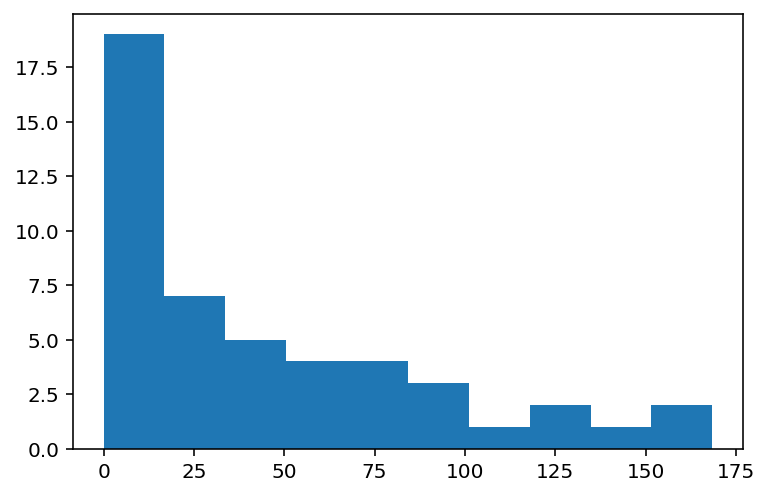

In [ ]:
import matplotlib.pyplot as plt

plt.hist(con_len_mean)

plt.show()

In [ ]:
likes_mean =[]
likes_mean = df_mbti['like'].groupby(df_mbti['name']).mean()
likes_mean = pd.DataFrame(likes_mean)

likes_mean=likes_mean.reset_index()

#############################################################
tag_cnt = []
for i in range(len(df_mbti)):
  tag_cnt.append(len(df_mbti['tags'][i].replace(',','').split()))

df_mbti['tag_cnt']=tag_cnt


tag_cnt_mean =[]
tag_cnt_mean = df_mbti['tag_cnt'].groupby(df_mbti['name']).mean()
tag_cnt_mean = pd.DataFrame(tag_cnt_mean)

tag_cnt_mean=tag_cnt_mean.reset_index()
###############################################################
place_cnt =[]
place_cnt = df_mbti['place'].groupby(df_mbti['name']).sum()
place_cnt = pd.DataFrame(place_cnt)

place_cnt=place_cnt.reset_index()
################################################################
timediff_mean =[]
timediff_mean = df_mbti['timediff'].groupby(df_mbti['name']).mean()
timediff_mean = pd.DataFrame(timediff_mean)

timediff_mean=timediff_mean.reset_index()
##################################################################



In [ ]:
df_mbti

,name,bio,content,date,like,place,tags,cnt,followers,follows,ratio,timediff,content_len,tag_cnt
0,1ooo_jaeni,20@r0se_n_mary,투재헌과 옥계친구들 - 부산정말 알차게 놀았던 이틀이었다:)#부산 #여행 #영도 #...,2021-11-07,67,1,"['부산', '여행', '영도', '흰여울문화마을', '해운대', '동백섬', '블...",9,214,192,0.897196,-34.0,104,11
1,1ooo_jaeni,20@r0se_n_mary,"투재헌과 옥계친구들 - 1일차, 무주리조트 (feat.야추🎲)#무주덕유산리조트 #여...",2021-07-02,42,1,"['무주덕유산리조트', '여름방학', '여행', '부루마블', '냄비', '무진장'...",9,214,192,0.897196,-128.0,77,8
2,1ooo_jaeni,20@r0se_n_mary,"투재헌과 옥계친구들 - 2일차, 대전우여곡절이 있었지만..😅 최고였다! ^~^#대전...",2021-07-02,43,1,"['대전', '여름방학', '여행', '한밭수목원', '성심당', '14시', '4...",9,214,192,0.897196,0.0,96,10
3,1ooo_jaeni,20@r0se_n_mary,우리 지역 바다가 돼버린 해운대 ⛱그리고 구미고 친구들 사이에 낀 풍산고 한명..😅...,2021-03-14,48,1,"['해운대', '해운대해수욕장', '동백섬', '부산']",9,214,192,0.897196,-110.0,69,4
4,1ooo_jaeni,20@r0se_n_mary,🍄 #mario #슈퍼마리오 #미디 #studioone #gx49 #카피 #midi...,2021-02-18,42,0,"['mario', '슈퍼마리오', '미디', 'studioone', 'gx49', ...",9,214,192,0.897196,-24.0,53,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,yun__ss_,NaN,"1/29~2/23 ✈ in malaysia 좋은 사람들, 천사 같은 아이들과 함께한...",2020-02-24,74,0,"['말레이시아', 'malaysia', 'pulaispringsresort']",5,182,191,1.049451,-93.0,220,3
641,yun__ss_,NaN,"사랑하는 금산 아이들, 10조 고마워♡#금산 #말레이시아 #pulaispringsr...",2020-02-14,57,0,"['금산', '말레이시아', 'pulaispringsresort', '조호르바루',...",5,182,191,1.049451,-10.0,66,5
642,yun__ss_,NaN,"그때가 그리운건지 ,그때의 내가 그리운건지#다낭 #호이안 #호이안올드타운 #호이안리조트",2019-10-21,53,0,"['다낭', '호이안', '호이안올드타운', '호이안리조트']",5,182,191,1.049451,-116.0,48,4
643,z0_heon,NaN,#카츠탄탄화명점#북구맛집,2020-05-22,11,0,"['카츠탄탄화명점', '북구맛집']",2,112,162,1.446429,-568.0,13,2


In [ ]:
df_mbti_1row=df_mbti.drop_duplicates(['name','bio','cnt','followers','follows'], keep = 'first')
df_mbti_1row.reset_index(drop=True)

,name,bio,content,date,like,place,tags,cnt,followers,follows,ratio,timediff,content_len,tag_cnt
0,1ooo_jaeni,20@r0se_n_mary,투재헌과 옥계친구들 - 부산정말 알차게 놀았던 이틀이었다:)#부산 #여행 #영도 #...,2021-11-07,67,1,"['부산', '여행', '영도', '흰여울문화마을', '해운대', '동백섬', '블...",9,214,192,0.897196,-34.0,104,11
1,2021.happiest_man,NaN,⛰🏃‍♂️🏃‍♂️,2021-11-13,56,1,[],3,183,262,1.431694,-28.0,9,1
2,7h.34min,23 PNU IE,#부산대#부산대맛집#부산대고기#오늘김해뒷고기#오김뒷#맛도리#뒷고기맛집,2021-11-09,20,0,"['부산대', '부산대맛집', '부산대고기', '오늘김해뒷고기', '오김뒷', '맛...",2,312,512,1.641026,-32.0,38,7
3,acoustic_string_cow,음악계 @acoustic_string_cow 일상계 @c.the_new선팔 무조건 ...,적재-잘지내(cover.)#적재 #잘지내 #클린톤 #일렉기타 #기타 #커버 #기타커...,2021-10-20,38,0,"['적재', '잘지내', '클린톤', '일렉기타', '기타', '커버', '기타커버...",45,329,327,0.993921,-52.0,141,18
4,annn_aelle_,NaN,공작발 전시회 과제하러 갔지만 날씨좋아서 기분좋았던날 ヽ(´▽`)/----#오브제후...,2021-11-26,153,0,"['오브제후드', '망미단길', '전시회', '갤러리', '사진전', '부산전시회'...",138,1420,645,0.454225,-15.0,151,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,xxco_vermin,🐰 𝐆𝐆𝐇𝐒 𝟏𝟏𝙩𝙝 🐰✧ ⋆—— ✧ *⋆* ✧ * ⋆* ✧ * ⋆* ✧——⋆ ✧@...,고국 최강 트리오..🔥------#고양국제고 #고국고 #트리오 #포르우나카베자 #음...,2021-11-11,302,1,"['고양국제고', '고국고', '트리오', '포르우나카베자', '음악회', '좋반'...",90,2774,379,0.136626,-30.0,137,18
59,yeon_smile.__,하고싶은거 다 해보기🌿,,NaT,0,0,['nan'],0,285,271,0.950877,NaN,0,1
60,yu_.oni,NaN,아무도 정관에 살지 않지만 어쨌든 정관에서 만남🥸,2021-11-15,81,1,[],76,247,246,0.995951,-26.0,27,1
61,yun__ss_,NaN,#해동용궁사 #오션뷰부동산투기 #바다는언제나맑은뒤흐림백만년만에 드라이브🙂부산 살아도...,2021-03-21,84,0,"['해동용궁사', '오션뷰부동산투기', '바다는언제나맑은뒤흐림백만년만에']",5,182,191,1.049451,-265.0,59,3


In [ ]:
df_mbti_1row = df_mbti_1row[['name','bio','cnt','followers','follows']].reset_index(drop=True)
df_mbti_1row

,name,bio,cnt,followers,follows
0,1ooo_jaeni,20@r0se_n_mary,9,214,192
1,2021.happiest_man,NaN,3,183,262
2,7h.34min,23 PNU IE,2,312,512
3,acoustic_string_cow,음악계 @acoustic_string_cow 일상계 @c.the_new선팔 무조건 ...,45,329,327
4,annn_aelle_,NaN,138,1420,645
...,...,...,...,...,...
58,xxco_vermin,🐰 𝐆𝐆𝐇𝐒 𝟏𝟏𝙩𝙝 🐰✧ ⋆—— ✧ *⋆* ✧ * ⋆* ✧ * ⋆* ✧——⋆ ✧@...,90,2774,379
59,yeon_smile.__,하고싶은거 다 해보기🌿,0,285,271
60,yu_.oni,NaN,76,247,246
61,yun__ss_,NaN,5,182,191


In [ ]:
df_mbti_1row=df_mbti_1row.fillna(0)

In [ ]:
bio_len =[]
for i in range(len(df_mbti_1row)):
  bio_len.append(len(str(df_mbti_1row['bio'].iloc[i])))

df_mbti_1row['bio_len'] = bio_len


In [ ]:
df_mbti_1row = df_mbti_1row[['name','bio_len','cnt','followers','follows']].reset_index(drop=True)
df_mbti_1row_1209=pd.merge(df_mbti_1row, con_len_mean, how='left', on='name')
df_mbti_1row_1209

,name,bio_len,cnt,followers,follows,content_len
0,1ooo_jaeni,14,9,214,192,73.888889
1,2021.happiest_man,1,3,183,262,54.333333
2,7h.34min,9,2,312,512,54.500000
3,acoustic_string_cow,50,45,329,327,118.379310
4,annn_aelle_,1,138,1420,645,89.029412
...,...,...,...,...,...,...
58,xxco_vermin,77,90,2774,379,72.066667
59,yeon_smile.__,12,0,285,271,0.000000
60,yu_.oni,1,76,247,246,70.300000
61,yun__ss_,1,5,182,191,88.600000


In [ ]:
df_mbti_1row_1209=pd.merge(df_mbti_1row_1209, likes_mean, how='left', on='name')
df_mbti_1row_1209=pd.merge(df_mbti_1row_1209, tag_cnt_mean, how='left', on='name')
df_mbti_1row_1209=pd.merge(df_mbti_1row_1209, place_cnt, how='left', on='name')
df_mbti_1row_1209=pd.merge(df_mbti_1row_1209, timediff_mean, how='left', on='name')
df_mbti_1row_1209=df_mbti_1row_1209.fillna(0)

In [ ]:
df_mbti_1row_1209
df_mbti=df_mbti_1row_1209
df_mbti

,name,bio_len,cnt,followers,follows,content_len,like,tag_cnt,place,timediff
0,1ooo_jaeni,14,9,214,192,73.888889,41.888889,6.444444,5,-115.888889
1,2021.happiest_man,1,3,183,262,54.333333,49.666667,1.000000,3,-137.000000
2,7h.34min,9,2,312,512,54.500000,43.000000,4.500000,1,-37.500000
3,acoustic_string_cow,50,45,329,327,118.379310,38.068966,10.793103,0,-18.241379
4,annn_aelle_,1,138,1420,645,89.029412,185.029412,9.058824,19,-7.147059
...,...,...,...,...,...,...,...,...,...,...
58,xxco_vermin,77,90,2774,379,72.066667,2112.466667,9.233333,22,-8.866667
59,yeon_smile.__,12,0,285,271,0.000000,0.000000,1.000000,0,0.000000
60,yu_.oni,1,76,247,246,70.300000,83.866667,1.000000,12,-25.133333
61,yun__ss_,1,5,182,191,88.600000,66.800000,3.200000,1,-156.400000


In [ ]:
#################################여기까지 수정######################################

In [ ]:
data_path = "/content/gdriv/My Drive/Colab Notebooks/Data"
# 크롤링한 데이터와 각 아이디의 mbti를 연결하기 위한 코드

mbti = pd.read_csv(data_path+'/MBTI.csv',encoding = 'utf-8')
mbti_perProfile = mbti.iloc[:, 21:23]
mbti_perProfile.columns = ['mbti', 'name']

###

a=[]
for i in range(len(mbti_perProfile)): # 엠비티아이 라벨링
  y=list(mbti_perProfile.iloc[i,0])
  a.append(y)
  mbti_perProfile['name'][i] = mbti_perProfile['name'][i].lower()

data = np.array(a)
df = pd.DataFrame(data)
mbti_perProfile = pd.concat([mbti_perProfile, df],axis=1)
mbti_perProfile.rename(columns={0:'i/e', 1:'s/n', 2:'f/t', 3:'j/p' },inplace=True)

mbti_perProfile = mbti_perProfile.reset_index(drop = False) # 반복문 돌리려고 ㅇㅇ



###

mbti_perProfile.to_csv('gdriv/My Drive/mbti_perProfile.csv', index=True, encoding = 'utf-8') # 병합된 데이터 저장



In [ ]:
mbti_perProfile

,index,mbti,name,i/e,s/n,f/t,j/p
0,0,ENTJ,wiseb0_0,E,N,T,J
1,1,ENFP,annn_aelle_,E,N,F,P
2,2,ENTJ,park_90002,E,N,T,J
3,3,ISFP,yeaeaun,I,S,F,P
4,4,ENTP,xxco_vermin,E,N,T,P
...,...,...,...,...,...,...,...
62,62,INTP,ho_li_me,I,N,T,P
63,63,ENFP,seongyeopppp,E,N,F,P
64,64,ESFP,gwak.nayeon,E,S,F,P
65,65,ENFJ,j.hoon119,E,N,F,J


In [ ]:
df_mbti

,name,bio_len,cnt,followers,follows,content_len,like,tag_cnt,place,timediff
0,1ooo_jaeni,14,9,214,192,73.888889,41.888889,6.444444,5,-115.777778
1,2021.happiest_man,1,3,183,262,54.333333,49.666667,1.000000,3,-136.666667
2,7h.34min,9,2,312,512,54.500000,43.000000,4.500000,1,-37.000000
3,acoustic_string_cow,50,45,329,327,118.379310,38.068966,10.793103,0,-18.206897
4,annn_aelle_,1,138,1420,645,89.029412,185.029412,9.058824,19,-7.117647
...,...,...,...,...,...,...,...,...,...,...
58,xxco_vermin,77,90,2774,379,72.066667,2112.466667,9.233333,22,-8.833333
59,yeon_smile.__,12,0,285,271,0.000000,0.000000,1.000000,0,0.000000
60,yu_.oni,1,76,247,246,70.300000,83.866667,1.000000,12,-25.100000
61,yun__ss_,1,5,182,191,88.600000,66.800000,3.200000,1,-156.200000


In [ ]:
# 합쳐주기

df_mbti['mbti'] = 0
df_mbti['i/e'] = 0
df_mbti['s/n'] = 0
df_mbti['f/t'] = 0
df_mbti['j/p'] = 0

for i in range(len(df_mbti)):
  for j in range(len(mbti_perProfile)):
    if df_mbti['name'][i] == mbti_perProfile['name'][j]:
      df_mbti['mbti'][i] = mbti_perProfile['mbti'][j]
      df_mbti['i/e'][i] = mbti_perProfile['i/e'][j]
      df_mbti['s/n'][i] = mbti_perProfile['s/n'][j]
      df_mbti['f/t'][i] = mbti_perProfile['f/t'][j]
      df_mbti['j/p'][i] = mbti_perProfile['j/p'][j]



df_mbti.to_csv('gdriv/My Drive/df_mbti.csv', index=True, encoding = 'utf-8') # 병합된 데이터 저장

df_mbti


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3

,name,bio_len,cnt,followers,follows,content_len,like,tag_cnt,place,timediff,mbti,i/e,s/n,f/t,j/p
0,1ooo_jaeni,14,9,214,192,73.888889,41.888889,6.444444,5,-115.888889,ISFJ,I,S,F,J
1,2021.happiest_man,1,3,183,262,54.333333,49.666667,1.000000,3,-137.000000,ESTP,E,S,T,P
2,7h.34min,9,2,312,512,54.500000,43.000000,4.500000,1,-37.500000,ENFJ,E,N,F,J
3,acoustic_string_cow,50,45,329,327,118.379310,38.068966,10.793103,0,-18.241379,ENTP,E,N,T,P
4,annn_aelle_,1,138,1420,645,89.029412,185.029412,9.058824,19,-7.147059,ENFP,E,N,F,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,xxco_vermin,77,90,2774,379,72.066667,2112.466667,9.233333,22,-8.866667,ENTP,E,N,T,P
59,yeon_smile.__,12,0,285,271,0.000000,0.000000,1.000000,0,0.000000,ISFJ,I,S,F,J
60,yu_.oni,1,76,247,246,70.300000,83.866667,1.000000,12,-25.133333,ISFP,I,S,F,P
61,yun__ss_,1,5,182,191,88.600000,66.800000,3.200000,1,-156.400000,ESFJ,E,S,F,J


In [ ]:
df_mbti

,name,bio,content,date,like,place,tags,cnt,followers,follows,ratio,timediff,content_len,mbti,i/e,s/n,f/t,j/p
0,1ooo_jaeni,1,투재헌과 옥계친구들 - 부산정말 알차게 놀았던 이틀이었다:)#부산 #여행 #영도 #...,2021-11-07,67,1,"['부산', '여행', '영도', '흰여울문화마을', '해운대', '동백섬', '블...",9,214,192,0.897196,NaN,104,ISFJ,0,0,0,0
1,1ooo_jaeni,1,"투재헌과 옥계친구들 - 1일차, 무주리조트 (feat.야추🎲)#무주덕유산리조트 #여...",2021-07-02,42,1,"['무주덕유산리조트', '여름방학', '여행', '부루마블', '냄비', '무진장'...",9,214,192,0.897196,-128.0,77,ISFJ,0,0,0,0
2,1ooo_jaeni,1,"투재헌과 옥계친구들 - 2일차, 대전우여곡절이 있었지만..😅 최고였다! ^~^#대전...",2021-07-02,43,1,"['대전', '여름방학', '여행', '한밭수목원', '성심당', '14시', '4...",9,214,192,0.897196,0.0,96,ISFJ,0,0,0,0
3,1ooo_jaeni,1,우리 지역 바다가 돼버린 해운대 ⛱그리고 구미고 친구들 사이에 낀 풍산고 한명..😅...,2021-03-14,48,1,"['해운대', '해운대해수욕장', '동백섬', '부산']",9,214,192,0.897196,-110.0,69,ISFJ,0,0,0,0
4,1ooo_jaeni,1,🍄 #mario #슈퍼마리오 #미디 #studioone #gx49 #카피 #midi...,2021-02-18,42,0,"['mario', '슈퍼마리오', '미디', 'studioone', 'gx49', ...",9,214,192,0.897196,-24.0,53,ISFJ,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,yun__ss_,0,"1/29~2/23 ✈ in malaysia 좋은 사람들, 천사 같은 아이들과 함께한...",2020-02-24,74,0,"['말레이시아', 'malaysia', 'pulaispringsresort']",5,182,191,1.049451,-93.0,220,ESFJ,1,0,0,0
641,yun__ss_,0,"사랑하는 금산 아이들, 10조 고마워♡#금산 #말레이시아 #pulaispringsr...",2020-02-14,57,0,"['금산', '말레이시아', 'pulaispringsresort', '조호르바루',...",5,182,191,1.049451,-10.0,66,ESFJ,1,0,0,0
642,yun__ss_,0,"그때가 그리운건지 ,그때의 내가 그리운건지#다낭 #호이안 #호이안올드타운 #호이안리조트",2019-10-21,53,0,"['다낭', '호이안', '호이안올드타운', '호이안리조트']",5,182,191,1.049451,-116.0,48,ESFJ,1,0,0,0
643,z0_heon,0,#카츠탄탄화명점#북구맛집,2020-05-22,11,0,"['카츠탄탄화명점', '북구맛집']",2,112,162,1.446429,NaN,13,ESTJ,1,0,1,0


12/1일 이후로 할것
mbti 더미화
eda하기

In [ ]:
#eda 
1. 엠비티아이 0,1로 변환시키기
2. x들끼리 상관관계보기 - 'bio','like','place','cnt','followers','follows','ratio','timediff','content_len'
3. x,y관계보기 (i/e에 따라 x들의 분포가 어떤지)
4. 각각 변수들마다 시각화해서 분포보기
5. 숫자 나오는거 상관계수보기
6. mbti라벨에 따라서 x들이 어떤 양상을 보이는지



SyntaxError: ignored

In [ ]:
# 1. 엠비티아이 0,1로 변환시키기
i = df_mbti.loc[df_mbti['i/e']== 'I',:].index
e = df_mbti.loc[df_mbti['i/e']== 'E',:].index
df_mbti.loc[i,'i/e'] = 0  # I는 0
df_mbti.loc[e,'i/e'] = 1  # E는 1

s = df_mbti.loc[df_mbti['s/n']== 'S',:].index
n = df_mbti.loc[df_mbti['s/n']== 'N',:].index
df_mbti.loc[s,'s/n'] = 0  # S는 0
df_mbti.loc[n,'s/n'] = 1  # N는 1

f = df_mbti.loc[df_mbti['f/t']== 'F',:].index
t = df_mbti.loc[df_mbti['f/t']== 'T',:].index
df_mbti.loc[f,'f/t'] = 0  # F는 0
df_mbti.loc[t,'f/t'] = 1  # T는 1

j = df_mbti.loc[df_mbti['j/p']== 'J',:].index
p = df_mbti.loc[df_mbti['j/p']== 'P',:].index
df_mbti.loc[j,'j/p'] = 0  # J는 0
df_mbti.loc[p,'j/p'] = 1  # P는 1



In [ ]:
df_mbti
#df_mbti.to_csv('gdriv/My Drive/1209.csv', index=True, encoding = 'utf-8') #11개가 중복데이터..
df_mbti = df_mbti.drop_duplicates(['name'])


In [ ]:
df_mbti.to_csv('gdriv/My Drive/1210.csv', index=True, encoding = 'utf-8')

In [ ]:

df_mbti.reset_index(drop=True, inplace=True)
df_mbti


,name,bio_len,cnt,followers,follows,content_len,like,tag_cnt,place,timediff,mbti,i/e,s/n,f/t,j/p
0,1ooo_jaeni,14,9,214,192,73.888889,41.888889,6.444444,5,-115.888889,ISFJ,0,0,0,0
1,2021.happiest_man,1,3,183,262,54.333333,49.666667,1.000000,3,-137.000000,ESTP,1,0,1,1
2,7h.34min,9,2,312,512,54.500000,43.000000,4.500000,1,-37.500000,ENFJ,1,1,0,0
3,acoustic_string_cow,50,45,329,327,118.379310,38.068966,10.793103,0,-18.241379,ENTP,1,1,1,1
4,annn_aelle_,1,138,1420,645,89.029412,185.029412,9.058824,19,-7.147059,ENFP,1,1,0,1
5,azu_c.e_re,1,45,121,85,128.933333,73.400000,16.400000,25,-21.966667,ESFJ,1,0,0,0
6,dal_sxxu,10,85,138,160,0.000000,100.000000,1.000000,0,-167.000000,ENFP,1,1,0,1
7,deogun04,48,21,567,443,29.066667,145.033333,1.000000,27,-26.366667,ESFP,1,0,0,1
8,dreamer_cha,82,1,238,227,53.000000,54.000000,8.000000,1,-37.000000,ENTJ,1,1,1,0
9,eastshine96,1,0,158,194,0.000000,0.000000,1.000000,0,0.000000,ESFJ,1,0,0,0


In [ ]:
#모델
from sklearn import tree
import sklearn.model_selection as ms

df_mbti = df_mbti.astype({'i/e':'int','s/n':'int','f/t':'int','j/p':'int'})

#j/p
X=df_mbti.iloc[:,2:-6]
Y = df_mbti.iloc[:,-2]

X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.3, random_state=42)
 
clf=tree.DecisionTreeClassifier(random_state=1, criterion='entropy', min_impurity_decrease=0.005)
mbtimodel=clf.fit(X_train, y_train)

In [ ]:
y_pred = mbtimodel.predict(X_test)

import sklearn.metrics as mt

# 학습결과 평가 

print('Train_Accuracy: ', mbtimodel.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  1.0 

Accuracy:  0.53 

Confusion Matrix: 
 [[ 7 10]
 [ 4  9]]


In [ ]:
#i/e
X=df_mbti.iloc[:,2:-6]
Y = df_mbti.iloc[:,-5]

X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.3, random_state=42)
 
clf=tree.DecisionTreeClassifier(random_state=1, criterion='entropy', min_impurity_decrease=0.005)
mbtimodel=clf.fit(X_train, y_train)

y_pred = mbtimodel.predict(X_test)

import sklearn.metrics as mt

# 학습결과 평가 

print('Train_Accuracy: ', mbtimodel.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  1.0 

Accuracy:  0.63 

Confusion Matrix: 
 [[12  5]
 [ 6  7]]


In [ ]:
#s/n
X=df_mbti.iloc[:,2:-6]
Y = df_mbti.iloc[:,-4]

X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.3, random_state=42)
 
clf=tree.DecisionTreeClassifier(random_state=1, criterion='entropy', min_impurity_decrease=0.005)
mbtimodel=clf.fit(X_train, y_train)

y_pred = mbtimodel.predict(X_test)

import sklearn.metrics as mt

# 학습결과 평가 

print('Train_Accuracy: ', mbtimodel.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  1.0 

Accuracy:  0.47 

Confusion Matrix: 
 [[ 7 12]
 [ 4  7]]


In [ ]:
#f/t
X=df_mbti.iloc[:,2:-6]
Y = df_mbti.iloc[:,-3]

X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.3, random_state=42)
 
clf=tree.DecisionTreeClassifier(random_state=1, criterion='entropy', min_impurity_decrease=0.005)
mbtimodel=clf.fit(X_train, y_train)

y_pred = mbtimodel.predict(X_test)

import sklearn.metrics as mt

# 학습결과 평가 

print('Train_Accuracy: ', mbtimodel.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  1.0 

Accuracy:  0.60 

Confusion Matrix: 
 [[ 8  9]
 [ 3 10]]


In [ ]:
############################################################모델만들기

In [ ]:
df_mbti.columns[-2]

#df_mbti.dtypes

df_mbti


,Unnamed: 0,name,open,bio_len,cnt,followers,follows,content_len,like,tag_cnt,place,timediff,mbti,i/e,s/n,f/t,j/p,Unnamed: 17
0,0,1ooo_jaeni,1,2,2,2,2,3,2,3,2,2,ISFJ,0,0,0,0,NaN
1,1,2021.happiest_man,1,0,1,2,2,3,2,1,2,2,ESTP,1,0,1,1,NaN
2,2,7h.34min,0,2,1,3,3,3,2,3,1,1,ENFJ,1,1,0,0,NaN
3,3,acoustic_string_cow,1,3,3,3,3,3,2,3,0,0,ENTP,1,1,1,1,NaN
4,4,annn_aelle_,1,0,3,3,3,3,3,3,3,0,ENFP,1,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,93,sxxkvely,1,2,3,1,0,1,1,1,3,0,INTP,0,1,1,1,NaN
91,94,d20_ny,1,2,0,1,1,0,0,0,0,3,INTP,0,1,1,1,NaN
92,95,yeaeaun,0,0,0,0,0,0,0,0,0,3,ISFP,0,0,0,1,NaN
93,96,jeewonyee,1,0,1,0,1,3,1,3,2,1,INTP,0,1,1,1,NaN


In [ ]:
#df_mbti[['open','bio_len','cnt','followers','follows','content_len','like','tag_cnt','place','timediff']]=df_mbti[['open','bio_len','cnt','followers','follows','content_len','like','tag_cnt','place','timediff']].astype('category')

In [ ]:
#정규화 확인 하는 셀
sc=df_mbti.iloc[:,2:-6]
sc
X

df=df_mbti
scaler_after = pd.DataFrame(X)
print(scaler_after)
for i in range(10):
  df.iloc[:,i+2]=scaler_after.iloc[:,i]

df
df.to_csv('gdriv/My Drive/afterminmax.csv', index=True, encoding = 'utf-8')

      0         1         2         3  ...         6         7         8         9
0   1.0  0.162791  0.025000  0.077145  ...  0.019829  0.319032  0.166667  0.000115
1   1.0  0.011628  0.008333  0.065970  ...  0.023511  0.049505  0.100000  0.000136
2   0.0  0.104651  0.005556  0.112473  ...  0.020355  0.222772  0.033333  0.000037
3   1.0  0.581395  0.125000  0.118601  ...  0.018021  0.534312  0.000000  0.000017
4   1.0  0.011628  0.383333  0.511896  ...  0.087589  0.448457  0.633333  0.000006
..  ...       ...       ...       ...  ...       ...       ...       ...       ...
93  1.0  0.116279  1.000000  0.031363  ...  0.006154  0.004950  0.733333  0.000000
94  1.0  0.104651  0.000000  0.032444  ...  0.000000  0.000000  0.000000  1.000000
95  0.0  0.000000  0.000000  0.011896  ...  0.000000  0.000000  0.000000  1.000000
96  1.0  0.000000  0.019444  0.028839  ...  0.014404  0.198020  0.166667  0.000036
97  1.0  0.000000  0.052778  0.034607  ...  0.014945  0.138614  0.600000  0.000094

[98

In [ ]:
!pip install xgboost

In [ ]:
##################################XGclassifier#########################################################
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sklearn.metrics as mt
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV
from google.colab import drive
drive.mount('/content/gdriv')

from sklearn.preprocessing import MinMaxScaler

##데이터케이스에 따라
#df_mbti = pd.read_csv('gdriv/My Drive/Colab Notebooks/Data/1210 - 1210 (2).csv', encoding = 'utf-8')  #아무것도 안한거 - minmax시키기(아래 코드사용)
df_mbti = pd.read_csv('gdriv/My Drive/Colab Notebooks/Data/12011201.csv', encoding = 'utf-8')   #범주화시킨거
#aa = pd.read_csv('gdriv/My Drive/Colab Notebooks/Data/aa.csv', encoding = 'utf-8')
aa = pd.read_csv('gdriv/My Drive/Colab Notebooks/Data/mbtimbti1212.csv', encoding = 'utf-8')

#nlp = pd.read_csv('gdriv/My Drive/Colab Notebooks/Data/NLPdata.csv', encoding = 'utf-8')


#from xgboost import XGBClassifier as xgb

#grid search
'''
X=df_mbti.iloc[:,2:-6]
Y = df_mbti.iloc[:,-5]

params = {
    'n_estimators' : [10,100],
    'learning_rate' : [0.01,0.2],
    'max_depth' : [3, 10]
}

X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.4, random_state=42)

#model1 = xgb.XGBClassifier(n_estimators=100,learning_rate=0.01,max_depth=3)
#model1.fit(X_train, y_train)
#y_pred = model1.predict( X_test)

dtc = xgb.XGBClassifier()

grid_tree = GridSearchCV(dtc, param_grid=params, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(X_test)
print('Train_Accuracy: ', em.score(X_train, y_train),'\n')


# 학습결과 평가 

print('Train_Accuracy: ', model1.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)
'''

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).


"\nX=df_mbti.iloc[:,2:-6]\nY = df_mbti.iloc[:,-5]\n\nparams = {\n    'n_estimators' : [10,100],\n    'learning_rate' : [0.01,0.2],\n    'max_depth' : [3, 10]\n}\n\nX_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.4, random_state=42)\n\n#model1 = xgb.XGBClassifier(n_estimators=100,learning_rate=0.01,max_depth=3)\n#model1.fit(X_train, y_train)\n#y_pred = model1.predict( X_test)\n\ndtc = xgb.XGBClassifier()\n\ngrid_tree = GridSearchCV(dtc, param_grid=params, cv=3, refit=True)\ngrid_tree.fit(X_train, y_train)\n\nprint('best parameters : ', grid_tree.best_params_)\nprint('best score : ', grid_tree.best_score_)\nem = grid_tree.best_estimator_\npred = em.predict(X_test)\nprint('Train_Accuracy: ', em.score(X_train, y_train),'\n')\n\n\n# 학습결과 평가 \n\nprint('Train_Accuracy: ', model1.score(X_train, y_train),'\n')\n\naccuracy = mt.accuracy_score(y_test, y_pred)\nmatrix = mt.confusion_matrix(y_test, y_pred)\n\nprint('Accuracy: ', format(accuracy,'.2f'),'\n')\nprint('Confusio

In [ ]:
'''
nlp = nlp.iloc[:,2:-1]
'''

In [ ]:
df_mbti=pd.merge(df_mbti, aa, how='left', on='name')

In [ ]:
df_mbti

,Unnamed: 0_x,name,open,bio_len,cnt,followers,follows,content_len,like_x,tag_cnt,place,timediff,mbti,i/e,s/n,f/t,j/p,Unnamed: 17,Unnamed: 0_y,upload,new_f4f,upload_after,daily_share,feed_state,reaction,review,no_reaction,like_y,feed_at,story_after,with_friend,search,story_upload,hash,follow,ex,couple,search_cafe,upload_time,MBTI,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,1ooo_jaeni,1,2,2,2,2,3,2,3,2,2,ISFJ,0,0,0,0,NaN,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,ISFJ,NaN,NaN,NaN
1,1,2021.happiest_man,1,0,1,2,2,3,2,1,2,2,ESTP,1,0,1,1,NaN,7.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,ESTP,NaN,NaN,NaN
2,2,7h.34min,0,2,1,3,3,3,2,3,1,1,ENFJ,1,1,0,0,NaN,37.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,ENFJ,NaN,NaN,NaN
3,3,acoustic_string_cow,1,3,3,3,3,3,2,3,0,0,ENTP,1,1,1,1,NaN,10.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,ENTP,NaN,NaN,NaN
4,4,annn_aelle_,1,0,3,3,3,3,3,3,3,0,ENFP,1,1,0,1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,ENFP,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,93,sxxkvely,1,2,3,1,0,1,1,1,3,0,INTP,0,1,1,1,NaN,104.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,INTP,NaN,NaN,NaN
91,94,d20_ny,1,2,0,1,1,0,0,0,0,3,INTP,0,1,1,1,NaN,105.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,INTP,NaN,NaN,NaN
92,95,yeaeaun,0,0,0,0,0,0,0,0,0,3,ISFP,0,0,0,1,NaN,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,ISFP,NaN,NaN,NaN
93,96,jeewonyee,1,0,1,0,1,3,1,3,2,1,INTP,0,1,1,1,NaN,28.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,INTP,NaN,NaN,NaN


In [ ]:
'''
df_mbti
df_mbti = df_mbti[['name','open','bio_len','cnt','followers','follows','content_len','like','tag_cnt','place','timediff','tag_category','avg_special','lenN','lenVV','lenVA','lenMAG','mbti','i/e','s/n','f/t','j/p','content']]
df_mbti
df_mbti.to_csv('gdriv/My Drive/connlp.csv', index=True, encoding = 'utf-8')
'''

In [ ]:
'''
df_mbti[['open','tag_category']].astype('category')
sc=df_mbti.iloc[0:48,1:-6]
'''

In [ ]:
df_mbti.dtypes

name             object
open              int64
bio_len           int64
cnt               int64
followers         int64
follows           int64
content_len     float64
like            float64
tag_cnt         float64
place             int64
timediff        float64
tag_category    float64
avg_special     float64
lenN            float64
lenVV           float64
lenVA           float64
lenMAG          float64
mbti             object
i/e               int64
s/n               int64
f/t               int64
j/p               int64
content          object
dtype: object

In [ ]:
#minmaxscaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(sc)
X=min_max_scaler.transform(sc)
X= pd.DataFrame(X)
X

KeyError: ignored

In [ ]:
#grid search : 교차검증까지가능 #연습용 
#X=df_mbti.iloc[:,1:-6]

Y = df_mbti.iloc[:,-2]

params = {
    'n_estimators' : range(10,100),
    'learning_rate' : np.arange(0.01,0.2),
    'max_depth' : range(3, 10)
}

X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.4, random_state=42)

#model1 = xgb.XGBClassifier(n_estimators=100,learning_rate=0.01,max_depth=3)
#model1.fit(X_train, y_train)
#y_pred = model1.predict( X_test)

dtc = xgb.XGBClassifier()

grid_tree = GridSearchCV(dtc, param_grid=params, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(mt.accuracy_score(y_test,pred)))
#print(np.max(grid_tree.cv_results_['mean_test_score']))

best parameters :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 80}
best score :  0.5359649122807018
테스트 데이터 세트 정확도: 0.6250


In [ ]:
df_mbti

,Unnamed: 0_x,name,open,bio_len,cnt,followers,follows,content_len,like_x,tag_cnt,place,timediff,mbti,i/e,s/n,f/t,j/p,Unnamed: 17,Unnamed: 0_y,upload,new_f4f,upload_after,daily_share,feed_state,reaction,review,no_reaction,like_y,feed_at,story_after,with_friend,search,story_upload,hash,follow,ex,couple,search_cafe,upload_time,MBTI,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,1ooo_jaeni,1,2,2,2,2,3,2,3,2,2,ISFJ,0,0,0,0,NaN,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,ISFJ,NaN,NaN,NaN
1,1,2021.happiest_man,1,0,1,2,2,3,2,1,2,2,ESTP,1,0,1,1,NaN,7.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,ESTP,NaN,NaN,NaN
2,2,7h.34min,0,2,1,3,3,3,2,3,1,1,ENFJ,1,1,0,0,NaN,37.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,ENFJ,NaN,NaN,NaN
3,3,acoustic_string_cow,1,3,3,3,3,3,2,3,0,0,ENTP,1,1,1,1,NaN,10.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,ENTP,NaN,NaN,NaN
4,4,annn_aelle_,1,0,3,3,3,3,3,3,3,0,ENFP,1,1,0,1,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,ENFP,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,93,sxxkvely,1,2,3,1,0,1,1,1,3,0,INTP,0,1,1,1,NaN,104.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,INTP,NaN,NaN,NaN
91,94,d20_ny,1,2,0,1,1,0,0,0,0,3,INTP,0,1,1,1,NaN,105.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,INTP,NaN,NaN,NaN
92,95,yeaeaun,0,0,0,0,0,0,0,0,0,3,ISFP,0,0,0,1,NaN,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,ISFP,NaN,NaN,NaN
93,96,jeewonyee,1,0,1,0,1,3,1,3,2,1,INTP,0,1,1,1,NaN,28.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,INTP,NaN,NaN,NaN


In [ ]:
df_mbti
y=df_mbti.iloc[:,13:17]
x1=df_mbti.iloc[:,2:12]
x2=df_mbti.iloc[:,19:-4]


x=pd.concat([x1, x2],axis=1)
x

,open,bio_len,cnt,followers,follows,content_len,like_x,tag_cnt,place,timediff,upload,new_f4f,upload_after,daily_share,feed_state,reaction,review,no_reaction,like_y,feed_at,story_after,with_friend,search,story_upload,hash,follow,ex,couple,search_cafe,upload_time
0,1,2,2,2,2,3,2,3,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,1,0,1,2,2,3,2,1,2,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0,2,1,3,3,3,2,3,1,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1,3,3,3,3,3,2,3,0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1,0,3,3,3,3,3,3,3,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1,2,3,1,0,1,1,1,3,0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
91,1,2,0,1,1,0,0,0,0,3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
92,0,0,0,0,0,0,0,0,0,3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
93,1,0,1,0,1,3,1,3,2,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
'''
x['open']=x['open'].astype("category")
x['upload']=x['upload'].astype("category")
x['new_f4f']=df_mbti_1row_1211_cate_X['new_f4f'].astype("category")
x['upload_after']=df_mbti_1row_1211_cate_X['upload_after'].astype("category")
x['daily_share']=df_mbti_1row_1211_cate_X['daily_share'].astype("category")
x['feed_state']=df_mbti_1row_1211_cate_X['feed_state'].astype("category")
x['reaction']=df_mbti_1row_1211_cate_X['reaction'].astype("category")
x['review']=df_mbti_1row_1211_cate_X['review'].astype("category")
x['no_reaction']=df_mbti_1row_1211_cate_X['no_reaction'].astype("category")
x['like_y']=df_mbti_1row_1211_cate_X['like_y'].astype("category")
df_mbti_1row_1211_cate_X['feed_at']=df_mbti_1row_1211_cate_X['feed_at'].astype("category")
df_mbti_1row_1211_cate_X['story_after']=df_mbti_1row_1211_cate_X['story_after'].astype("category")
df_mbti_1row_1211_cate_X['hash']=df_mbti_1row_1211_cate_X['hash'].astype("category")
df_mbti_1row_1211_cate_X['follow']=df_mbti_1row_1211_cate_X['follow'].astype("category")
df_mbti_1row_1211_cate_X['ex']=df_mbti_1row_1211_cate_X['ex'].astype("category")
df_mbti_1row_1211_cate_X['couple']=df_mbti_1row_1211_cate_X['couple'].astype("category")
df_mbti_1row_1211_cate_X['search_cafe']=df_mbti_1row_1211_cate_X['search_cafe'].astype("category")
df_mbti_1row_1211_cate_X['upload_time']=df_mbti_1row_1211_cate_X['upload_time'].astype("category")
df_mbti_1row_1211_cate_X['with_friend']=df_mbti_1row_1211_cate_X['with_friend'].astype("category")
df_mbti_1row_1211_cate_X['search']=df_mbti_1row_1211_cate_X['search'].astype("category")
df_mbti_1row_1211_cate_X['story_upload']=df_mbti_1row_1211_cate_X['story_upload'].astype("category")


df_mbti_1row_1211_cate_X.dtypes
'''

In [ ]:
###모델(1212)

for i in [0,1,2,3]:
  X=x.iloc[:,0:]
  Y=y.iloc[:,i]

  print(y.columns[i])
  params = {
      'n_estimators' : range(10,100),
      'learning_rate' : np.arange(0.01,0.2),
      'max_depth' : range(3, 10)
  }

  X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.4, random_state=42)

  dtc = xgb.XGBClassifier()

  grid_tree = GridSearchCV(dtc, param_grid=params, cv=3, refit=True)
  grid_tree.fit(X_train, y_train)

  print('best parameters : ', grid_tree.best_params_)
  print('best score : ', grid_tree.best_score_)
  em = grid_tree.best_estimator_
  pred = em.predict(X_test)
  print('테스트 데이터 세트 정확도: {0:.4f}'.format(mt.accuracy_score(y_test,pred)))
  print('테스트 세트 점수 : {:.2f}'.format(grid_tree.score(X_test, y_test)))
  print("----------------------------------------------------------------")


i/e
best parameters :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 49}
best score :  0.7368421052631579
테스트 데이터 세트 정확도: 0.6842
테스트 세트 점수 : 0.68
----------------------------------------------------------------
s/n
best parameters :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 34}
best score :  0.6140350877192983
테스트 데이터 세트 정확도: 0.5526
테스트 세트 점수 : 0.55
----------------------------------------------------------------
f/t
best parameters :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}
best score :  0.7719298245614036
테스트 데이터 세트 정확도: 0.6316
테스트 세트 점수 : 0.63
----------------------------------------------------------------
j/p
best parameters :  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 18}
best score :  0.7543859649122808
테스트 데이터 세트 정확도: 0.6842
테스트 세트 점수 : 0.68
----------------------------------------------------------------


In [ ]:
''''
#j/p
X=df_mbti.iloc[:,2:-6]
Y = df_mbti.iloc[:,-2]
#X=pd.DataFrame(X)
#print(X)
X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.2, random_state=42)

model1 = xgb.XGBClassifier(n_estimators=86,learning_rate=0.01,max_depth=3)
model1.fit(X_train, y_train)
y_pred = model1.predict( X_test)

import sklearn.metrics as mt

# 학습결과 평가 

print('Train_Accuracy: ', model1.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.7631578947368421 

Accuracy:  0.26 

Confusion Matrix: 
 [[ 1 11]
 [ 3  4]]


In [ ]:
'''
#f/t
X=df_mbti.iloc[:,2:-6]
Y = df_mbti.iloc[:,-3]

X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.4, random_state=42)

model1 = xgb.XGBClassifier(n_estimators=10,learning_rate=0.01,max_depth=3)
model1.fit(X_train, y_train)
y_pred = model1.predict( X_test)

import sklearn.metrics as mt

# 학습결과 평가 

print('Train_Accuracy: ', model1.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.7543859649122807 

Accuracy:  0.63 

Confusion Matrix: 
 [[ 9 10]
 [ 4 15]]


In [ ]:
'''
#s/n    
#X=df_mbti.iloc[:,2:-6]
Y = df_mbti.iloc[:,-4]

X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.4, random_state=42)

model1 = xgb.XGBClassifier(n_estimators=100,learning_rate=0.02,max_depth=3)
model1.fit(X_train, y_train)
y_pred = model1.predict( X_test)

import sklearn.metrics as mt

# 학습결과 평가 

print('Train_Accuracy: ', model1.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.9655172413793104 

Accuracy:  0.50 

Confusion Matrix: 
 [[ 8 16]
 [ 4 12]]


In [ ]:
'''
#i/e   
#X=df_mbti.iloc[:,2:-6]
Y = df_mbti.iloc[:,-5]

X_train, X_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.4, random_state=42)

model1 = xgb.XGBClassifier(n_estimators=100,learning_rate=0.01,max_depth=10)
model1.fit(X_train, y_train)
y_pred = model1.predict( X_test)

import sklearn.metrics as mt

# 학습결과 평가 

print('Train_Accuracy: ', model1.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.9310344827586207 

Accuracy:  0.78 

Confusion Matrix: 
 [[16  5]
 [ 4 15]]
